# <center> The Billion Dollar Question

## A Pandas and SQL Analysis of Billionaire Net Worth

#### Data Courtesy of The Peterson Institute for International Economics

## Background

The world's billionaires possess more wealth than 4.6 billion people, or over half of the planet, according to a 2020 report by OxFam International, an advocacy firm. For scale, the OxFam report and Peterson Institute study included roughly 2000 individuals with net worths over 1 billion USD.<br><br>
A disproportionate distribution of wealth is not only exacerbating inequality worldwide, it can also result in detrimental health outcomes for the global poor and a stifling of opportunity for those striving to reach the middle class. Since those with disproportionate money and power often leave secluded lives, investigating quantitative data related to finances and personal characteristics can help analysts and advocates understand just how wide the wealth acquisition gap is.   

# Research Questions

#### Which industry sectors have produced the most billionaires?
#### Who are the wealthiest men in the world?
#### Who are the wealthiest women in the world?
#### What is the correlation between age and net worth? 
#### Which countries produce the most billionaires? 

# Methods

#### This project employs Python's Pandas library for importing, preparing, cleaning and analyzing CSV data.
#### Ensuing data frames are converted into SQL files that can be manipulated and queried.
#### The results are visually represented using Seaborn. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
import re
import sqlite3

In [2]:
billion_data = pd.read_csv('Billionaries_data.csv', encoding='unicode_escape')
billion_data.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,1996,Bill Gates,1,United States,USA,18.5,self-made,founder non-finance,male,40.0,...,founder,1975.0,8.100000e+12,NaN,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
1,2001,Bill Gates,1,United States,USA,58.7,self-made,founder non-finance,male,45.0,...,founder,1975.0,1.060000e+13,NaN,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
2,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
3,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
4,1996,Warren Buffett,2,United States,USA,15.0,self-made,founder non-finance,male,65.0,...,founder,1962.0,8.100000e+12,NaN,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN


In [3]:
billion_data.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

In [4]:
billion_data.isna().sum()

year                          0
name                          0
rank                          0
citizenship                   0
countrycode                   0
networthusbillion             0
selfmade                     22
typeofwealth                 22
gender                       34
age                         185
industry                      1
IndustryAggregates            1
region                        0
north                         0
politicalconnection        2536
founder                       0
generationofinheritance       0
sector                       23
company                      38
companytype                  36
relationshiptocompany        46
foundingdate                 40
gdpcurrentus               1665
sourceofwealth              976
notes                      1424
notes2                     2417
source                       43
source_2                    471
source_3                   1839
source_4                   2591
dtype: int64

#### Since we have multiple columns with hundreds, if not thousands of NA values, it is necessary to determine how to replace this data. 

#### Irrelevant columns include variables that include extraneous information like URLs. 
#### Additionally, columns like 'political connection' and 'north' have very few relevant values and can be dropped entirely.  

In [5]:
billion_data.drop(['source_4','source_3','source_2','source','notes2','notes','politicalconnection','north'],axis=1,inplace = True)
billion_data.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,region,founder,generationofinheritance,sector,company,companytype,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth
0,1996,Bill Gates,1,United States,USA,18.5,self-made,founder non-finance,male,40.0,...,North America,1,0,Software,Microsoft,new,founder,1975.0,8.100000e+12,NaN
1,2001,Bill Gates,1,United States,USA,58.7,self-made,founder non-finance,male,45.0,...,North America,1,0,Software,Microsoft,new,founder,1975.0,1.060000e+13,NaN
2,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,North America,1,0,Software,Microsoft,new,founder,1975.0,NaN,Microsoft
3,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,Latin America,1,0,Communications,Telmex,privatization,founder,1990.0,NaN,telecom
4,1996,Warren Buffett,2,United States,USA,15.0,self-made,founder non-finance,male,65.0,...,North America,1,0,Finance,Berkshire Hathaway,new,founder,1962.0,8.100000e+12,NaN


#### Since most of the data values are Pandas objects, we'll convert them to numeric data types.

In [6]:
billion_data['foundingdate'] = billion_data['foundingdate'].astype(float)
billion_data['year'] = billion_data['year'].astype(int)

In [7]:
billion_data.dtypes

year                         int32
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
dtype: object

#### For data analysis it is important to retain as many row values as possible. That means that I want to avoid dropping entire columns unless I'm sure they're irrelevant to the overall analysis. 
#### Therefore, I wanted to manually impute placeholder values to replace NAs and retain rows in the dataset. 

In [8]:
billion_data['age'].mean()

57.40386990531083

In [9]:
billion_data['selfmade'] = billion_data['selfmade'].fillna('non-finance')
billion_data['typeofwealth'] = billion_data['typeofwealth'].fillna('non-finance')
billion_data['gender'] = billion_data['gender'].fillna('none')
billion_data['age'] = billion_data['age'].fillna(round(billion_data['age'].mean(),2))
billion_data['industry'] = billion_data['industry'].fillna('Finance')
billion_data['IndustryAggregates'] = billion_data['IndustryAggregates'].fillna('Financial')
billion_data['sector'] = billion_data['sector'].fillna('trading')
billion_data['company'] = billion_data['company'].fillna(' ')
billion_data['companytype'] = billion_data['companytype'].fillna('existing')
billion_data['relationshiptocompany'] = billion_data['relationshiptocompany'].fillna('relation')
billion_data['foundingdate'] = billion_data['foundingdate'].fillna(0)
billion_data['gdpcurrentus'] = billion_data['gdpcurrentus'].fillna(0)
billion_data['sourceofwealth'] = billion_data['sourceofwealth'].fillna('investments')

In [10]:
billion_data.rename(columns={'year': 'Year', 'name': 'Name', 'rank': 'Rank', 'citizenship': 'Citizenship',
                           'countrycode': 'Country_code', 'networthusbillion': 'Net_worth_US_billion', 'selfmade':
                           'Self_made', 'typeofwealth': 'Type_of_wealth', 'gender': 'Gender', 'age': 'Age',
                           'industry': 'Industry', 'IndustryAggregates': 'Industry_Aggregates', 'region':
                           'Region', 'founder': 'Founder', 'generationofinheritance': 'Generation_of_inheritance',
                           'sector': 'Sector', 'company': 'Company', 'companytype': 'Company_type',
                           'relationshiptocompany': 'Relationship_to_Company', 'foundingdate': 'Founding_date',
                           'gdpcurrentus': 'GDP_Current_US', 'sourceofwealth': 'Source_of_Wealth'}, inplace=True)

#### The Path library from Python allows me to create a SQL Lite database that I can connect to with Pandas' 'to_sql' method. 

In [11]:
Path('billion_data.db').touch()
billion_conn = sqlite3.connect('billion_data.db')
billion_c = billion_conn.cursor()

In [12]:
billion_data.to_sql('billion_data', billion_conn, if_exists='append', index=False)

2614

In [13]:
billion_data_list = pd.read_sql(''' SELECT * FROM billion_data LIMIT 10 ''', billion_conn)
billion_data_list

,Year,Name,Rank,Citizenship,Country_code,Net_worth_US_billion,Self_made,Type_of_wealth,Gender,Age,...,Region,Founder,Generation_of_inheritance,Sector,Company,Company_type,Relationship_to_Company,Founding_date,GDP_Current_US,Source_of_Wealth
0,1996,Bill Gates,1,United States,USA,18.5,self-made,founder non-finance,male,40.0,...,North America,1,0,Software,Microsoft,new,founder,1975.0,8.100000e+12,investments
1,2001,Bill Gates,1,United States,USA,58.7,self-made,founder non-finance,male,45.0,...,North America,1,0,Software,Microsoft,new,founder,1975.0,1.060000e+13,investments
2,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,North America,1,0,Software,Microsoft,new,founder,1975.0,0.000000e+00,Microsoft
3,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,Latin America,1,0,Communications,Telmex,privatization,founder,1990.0,0.000000e+00,telecom
4,1996,Warren Buffett,2,United States,USA,15.0,self-made,founder non-finance,male,65.0,...,North America,1,0,Finance,Berkshire Hathaway,new,founder,1962.0,8.100000e+12,investments
5,2001,Warren Buffett,2,United States,USA,32.3,self-made,founder non-finance,male,70.0,...,North America,1,0,Finance,Berkshire Hathaway,new,founder,1962.0,1.060000e+13,investments
6,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,Europe,1,0,Fashion,Zara,new,founder,1975.0,0.000000e+00,retail
7,1996,Oeri Hoffman and Sacher,3,Switzerland,CHE,13.1,inherited,inherited,none,0.0,...,Europe,0,Third generation,pharmaceuticals,F. Hoffmann-La Roche,new,relation,1896.0,3.300000e+11,investments
8,2001,Paul Allen,3,United States,USA,30.4,self-made,founder non-finance,male,48.0,...,North America,1,0,technology,Microsoft,new,founder,1975.0,1.060000e+13,investments
9,2001,Larry Ellison,4,United States,USA,26.0,self-made,founder non-finance,male,56.0,...,North America,1,0,software,Oracle,new,founder,1977.0,1.060000e+13,investments


#### The majority of net worth values in the dataset falls between 0 and 10 billion dollars. 

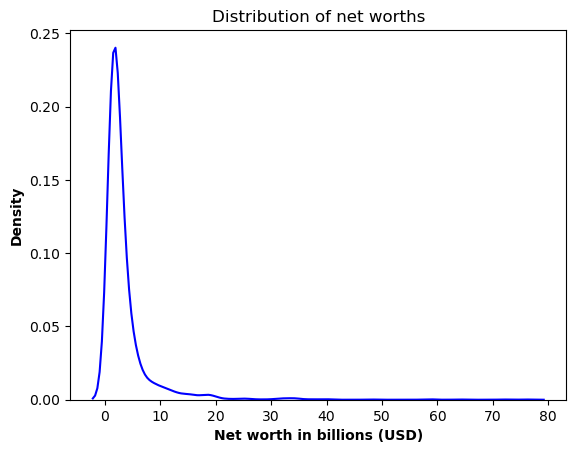

In [14]:
kde = sns.kdeplot(data=billion_data['Net_worth_US_billion'], color = 'blue')
kde.set_title('Distribution of net worths',color='black').set_fontsize(12)
kde.set_xlabel('Net worth in billions (USD)', weight = 'bold', color = 'black').set_fontsize(10)
kde.set_ylabel('Density', weight = 'bold', color = 'black').set_fontsize(10)

In [15]:
top_ten = pd.read_sql(''' SELECT Name, Net_worth_US_billion FROM billion_data GROUP BY Net_worth_US_billion
                ORDER BY Net_worth_US_billion DESC LIMIT 10 ''', billion_conn)
top_ten

,Name,Net_worth_US_billion
0,Bill Gates,76.0
1,Carlos Slim Helu,72.0
2,Amancio Ortega,64.0
3,Bill Gates,58.7
4,Warren Buffett,58.2
5,Larry Ellison,48.0
6,Charles Koch,40.0
7,Sheldon Adelson,38.0
8,Christy Walton,36.7
9,Jim Walton,34.7


#### However, for the world's richest people, the distribution extends from 15 to 100 billion dollars. 

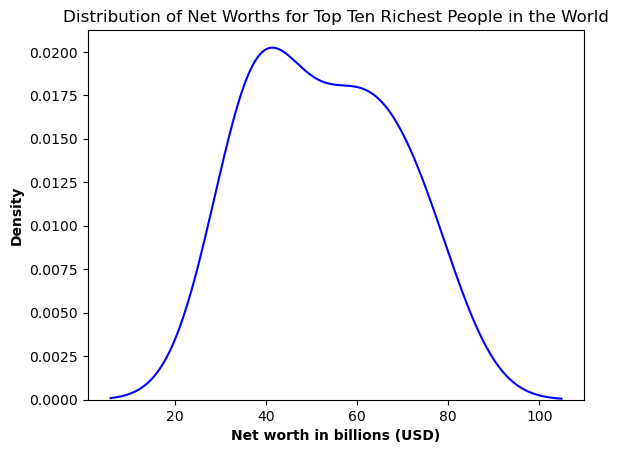

In [16]:
kde = sns.kdeplot(top_ten['Net_worth_US_billion'],color='blue')
kde.set_title('Distribution of Net Worths for Top Ten Richest People in the World',color='black').set_fontsize(12)
kde.set_xlabel('Net worth in billions (USD)', weight = 'bold', color = 'black').set_fontsize(10)
kde.set_ylabel('Density', weight = 'bold', color = 'black').set_fontsize(10)

#### At the date of this report Bill Gates was the richest individual in the world. Amazon CEO Jeff Bezos has since usurped his title. 
#### The top 10 richest individuals in the world only includes one woman, Christy Walton, Walmart heiress. 

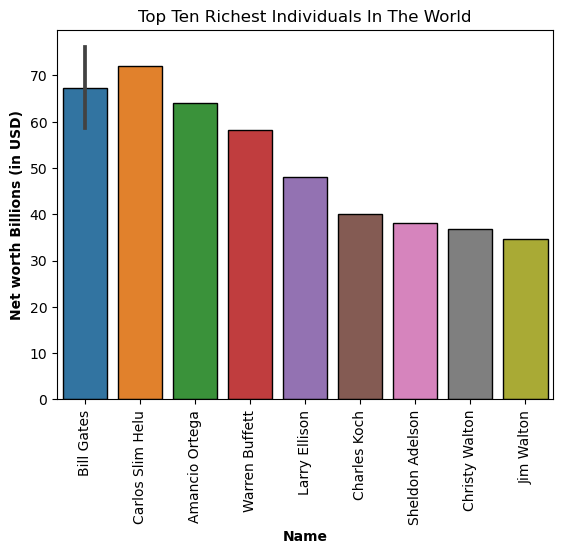

In [17]:
bar = sns.barplot(x=top_ten['Name'],y=top_ten['Net_worth_US_billion'], edgecolor='black')
bar.set_title('Top Ten Richest Individuals In The World',color='black').set_fontsize(12)
bar.set_xlabel('Name', weight = 'bold', color = 'black').set_fontsize(10)
bar.set_ylabel('Net worth Billions (in USD)', weight = 'bold', color = 'black').set_fontsize(10)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90);

In [18]:
america = pd.read_sql(''' SELECT DISTINCT Name, Net_worth_US_billion, Self_made FROM billion_data
                        WHERE Age < 30
                        GROUP BY Net_worth_US_billion
                        ORDER BY Net_worth_US_billion DESC
                        LIMIT 10 ''', billion_conn)
america

,Name,Net_worth_US_billion,Self_made
0,Mark Zuckerberg,28.5,self-made
1,Oeri Hoffman and Sacher,13.1,inherited
2,Walter Thomas and Raymond Kwok,11.2,inherited
3,Theo and Karl Albrecht,9.0,inherited
4,Haniel family,8.1,inherited
5,Tan Yu,7.0,self-made
6,Dustin Moskovitz,6.8,self-made
7,Wonowidjojo family,6.7,inherited
8,Chung Ju-yung,5.9,self-made
9,Gerard Mulliez,5.7,self-made


#### The net worths of the world's youngest billionaires is more consistent with the sample distribution, with the mean falling between 5 and 20 billion dollars.  

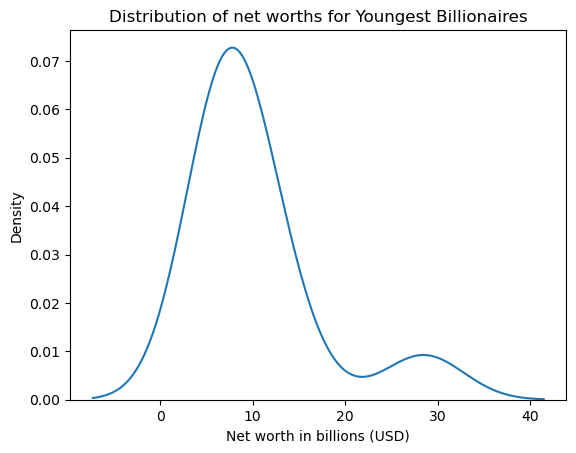

In [19]:
kde = sns.kdeplot(data=america, x='Net_worth_US_billion')
kde.set_title('Distribution of net worths for Youngest Billionaires',color='black').set_fontsize(12)
kde.set_xlabel('Net worth in billions (USD)',color='black').set_fontsize(10)
kde.set_ylabel('Density',color='black').set_fontsize(10)

#### Dividing the youngest billionaires into two categories, self-made and inherited, reveals that there is a 50-50 split between self-made billionaires and heirs. 

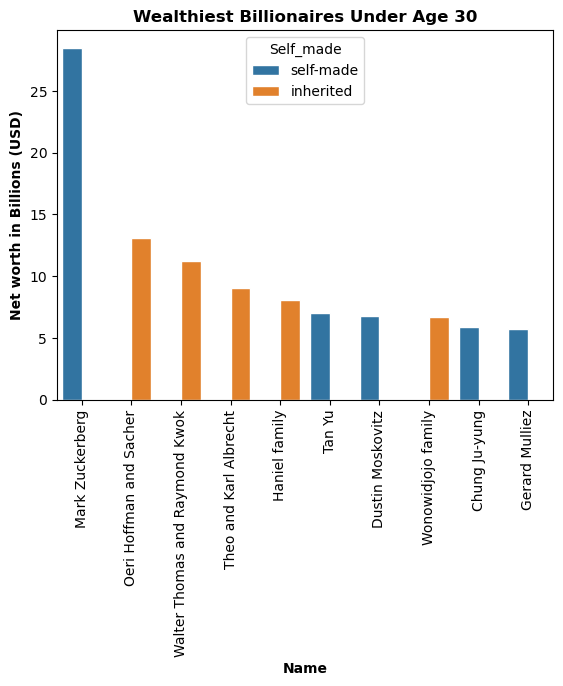

In [20]:
bar = sns.barplot(hue=america['Self_made'],x = america['Name'],y=america['Net_worth_US_billion'], edgecolor='white')
bar.set_title('Wealthiest Billionaires Under Age 30', weight = 'bold', color='black').set_fontsize(12)
bar.set_xlabel('Name', weight = 'bold', color = 'black').set_fontsize(10)
bar.set_ylabel('Net worth in Billions (USD)', weight = 'bold', color = 'black').set_fontsize(10)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90);

In [21]:
oldest_billion = pd.read_sql(''' SELECT Name, Age, Net_worth_US_billion, 'Self_made' FROM billion_data
                                WHERE AGE > 65 AND CITIZENSHIP = 'United States'
                                GROUP BY AGE
                                ORDER BY AGE DESC
                                ''', billion_conn)
oldest_billion

,Name,Age,Net_worth_US_billion,'Self_made'
0,"David Rockefeller, Sr.",98.0,2.9,Self_made
1,Kirk Kerkorian,96.0,4.5,Self_made
2,Henry Hillman,95.0,2.5,Self_made
3,Anne Cox Chambers,94.0,15.5,Self_made
4,"William Moncrief, Jr.",93.0,1.0,Self_made
5,John Simplot,92.0,3.6,Self_made
6,Jack Taylor,91.0,12.8,Self_made
7,Sumner Redstone,90.0,6.2,Self_made
8,S. Daniel Abraham,89.0,2.0,Self_made
9,Richard DeVos,88.0,6.9,Self_made


#### Unsurprisingly, the table reveals that the wealthiest billionaires over age 65 tend to fall into the self-made category. 

#### The mean for the oldest billionaires is lower than that of youngest billionaires at 1 to 5 billion dollars. 

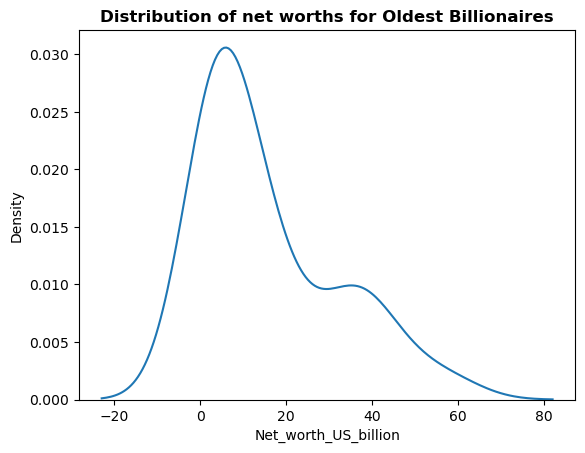

In [22]:
dist = sns.kdeplot(data=oldest_billion['Net_worth_US_billion'])
dist.set_title('Distribution of net worths for Oldest Billionaires', weight='bold', color = 'black',fontsize=12);

C:\Users\HP\AppData\Local\Temp\ipykernel_1752\66483596.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter.set_xticklabels(scatter.get_xticklabels(),rotation=90);


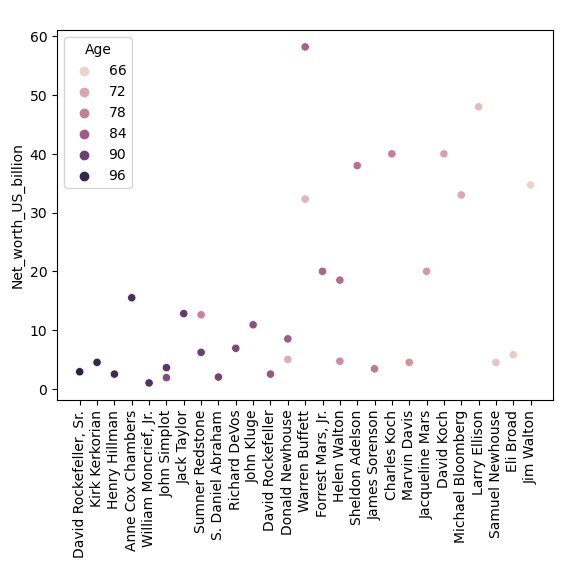

In [23]:
scatter = sns.scatterplot(data = oldest_billion, x = 'Name', y = 'Net_worth_US_billion', hue = 'Age')
scatter.set_title('Oldest Billionaires in America', weight = 'bold', color = 'white').set_fontsize(12)
scatter.set_xlabel('Name', weight = 'bold', color = 'white').set_fontsize(10)
scatter.set_xlabel('Net worth in Billions (USD)', weight = 'bold', color = 'white').set_fontsize(10)
scatter.set_xticklabels(scatter.get_xticklabels(),rotation=90);

In [24]:
sector = pd.read_sql(''' SELECT Sector, AVG(Net_worth_US_billion), COUNT(Sector) AS Sector_Count,
                        COUNT(Sector) * 100.0 / (SELECT COUNT(*) FROM billion_data) AS Sector_Percent
                        FROM billion_data
                        GROUP BY Sector
                        ORDER BY Sector_Percent DESC
                        LIMIT 10''', billion_conn)
sector

,Sector,AVG(Net_worth_US_billion),Sector_Count,Sector_Percent
0,real estate,3.491525,885,6.771232
1,retail,4.010833,600,4.590666
2,media,4.158974,585,4.475899
3,construction,2.225000,480,3.672533
4,banking,2.636559,465,3.557766
5,pharmaceuticals,2.802632,380,2.907422
6,oil,2.908108,370,2.830910
7,software,2.611940,335,2.563122
8,hedge funds,3.564000,250,1.912777
9,technology,7.322222,180,1.377200


### The top three sectors with highest aggregate wealth percentages were real estate, retail and media. 
#### The U.S. real estate industry is currently worth 3 trillion dollars.
#### The retail industry reports projected earnings of over 5 trillion dollars.
#### The U.S. media industry boasts an aggregate worth of over 700 billion dollars.

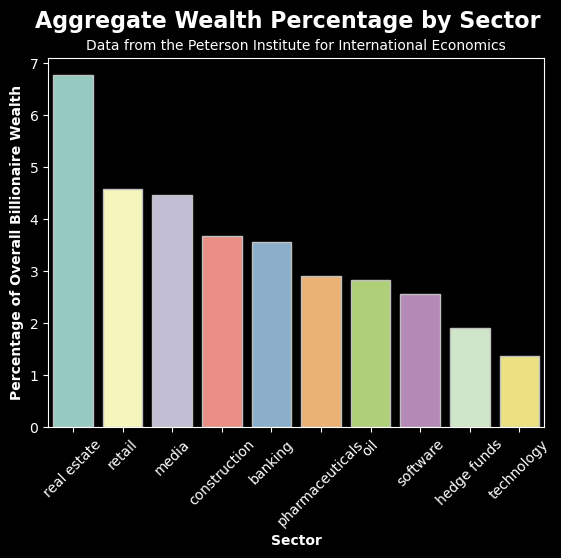

In [25]:
plt.style.use('dark_background')
plt.suptitle('Aggregate Wealth Percentage by Sector', weight='bold', color='white').set_fontsize(16)
plt.title('Data from the Peterson Institute for International Economics', color = 'white').set_fontsize(10)
sns.barplot(x=sector['Sector'], y=sector['Sector_Percent'], edgecolor='silver')
plt.xlabel('Sector', weight = 'bold')
plt.ylabel('Percentage of Overall Billionaire Wealth', weight = 'bold')
plt.xticks(rotation=45);

In [26]:
type_of_wealth = pd.read_sql(''' SELECT Type_of_wealth, AVG(Net_worth_US_billion), COUNT(Type_of_wealth) AS Count_Wealth_Type,
                            COUNT(Type_of_wealth) * 100.0 / (SELECT COUNT(*) FROM billion_data) AS Wealth_Type_Percent
                            FROM billion_data
                            GROUP BY Type_of_wealth
                            ORDER BY Wealth_Type_Percent DESC
                            LIMIT 10''', billion_conn)
type_of_wealth

,Type_of_wealth,AVG(Net_worth_US_billion),Count_Wealth_Type,Wealth_Type_Percent
0,inherited,3.737566,4765,36.457536
1,founder non-finance,3.786396,3565,27.276205
2,self-made finance,3.091400,2500,19.127774
3,privatized and resources,3.756780,1180,9.028309
4,executive,2.644211,950,7.268554
5,non-finance,1.645455,110,0.841622


#### The top wealth source for billionaires was inheritance. 
#### The finance industry remained a top wealth source for the world's billionaires.

Text(0, 0.5, 'Type of Wealth')

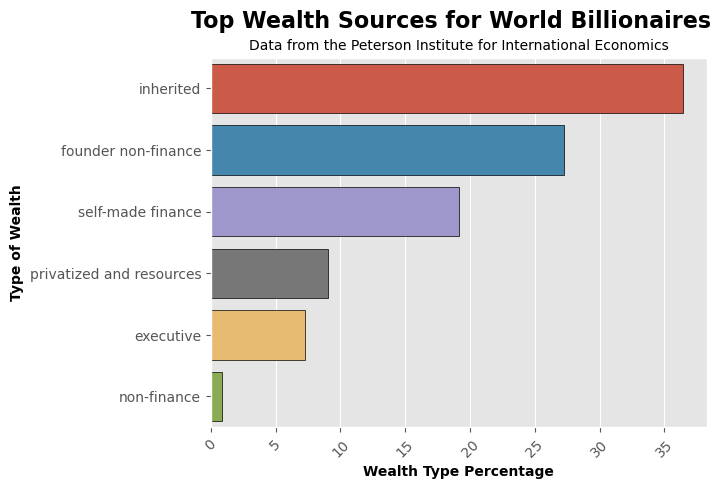

In [27]:
plt.style.use('ggplot')
plt.suptitle('Top Wealth Sources for World Billionaires', weight='bold', color = 'black').set_fontsize(16)
plt.title('Data from the Peterson Institute for International Economics', color = 'black').set_fontsize(10)
sns.barplot(x=type_of_wealth['Wealth_Type_Percent'], y=type_of_wealth['Type_of_wealth'], edgecolor='black', orient='h')
plt.xlabel('Wealth Type Percentage', weight = 'bold', color = 'black')
plt.xticks(rotation=45);
plt.ylabel('Type of Wealth', weight = 'bold', color = 'black')

In [28]:
female_billion = pd.read_sql(''' SELECT DISTINCT Name, Gender, Net_worth_US_billion, Rank FROM billion_data
                                WHERE Gender = 'female'
                                GROUP BY Net_worth_US_billion
                                ORDER BY Rank ASC
                                LIMIT 15 ''', billion_conn)
female_billion

,Name,Gender,Net_worth_US_billion,Rank
0,Christy Walton,female,36.7,9
1,Alice Walton,female,18.5,10
2,Johanna Quandt,female,8.1,11
3,Liliane Bettencourt,female,34.5,11
4,Johanna Quandt,female,17.8,12
5,Alice Walton,female,34.3,13
6,Liliane Bettencourt,female,15.6,15
7,Anne Cox Chambers,female,11.7,21
8,Abigail Johnson,female,9.1,30
9,Jacqueline Mars,female,9.0,31


#### Two Walmart heiresses, Christy Walton and Alice Walton, dominate the richest women in the world rankings.

Text(0, 0.5, 'Net Worth In Billions (USD)')

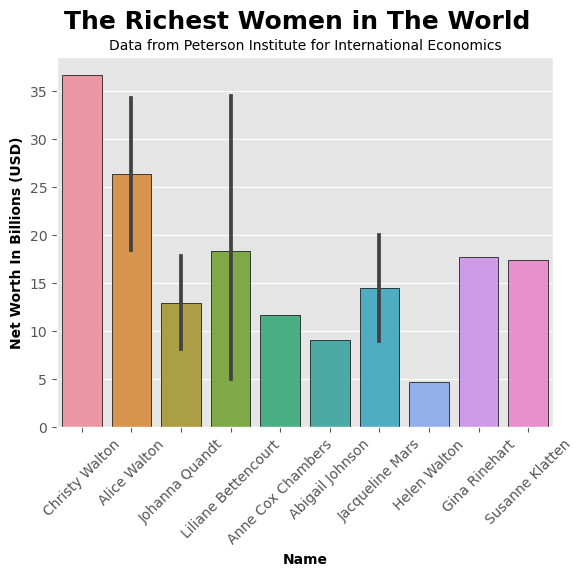

In [29]:
plt.style.use('ggplot')
plt.suptitle('The Richest Women in The World', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from Peterson Institute for International Economics', color = 'black').set_fontsize(10)
sns.barplot(x=female_billion['Name'], y=female_billion['Net_worth_US_billion'], edgecolor='black')
plt.xlabel('Name', weight = 'bold', color = 'black')
plt.xticks(rotation=45);
plt.ylabel('Net Worth In Billions (USD)', weight = 'bold', color = 'black')

In [30]:
region_percentage = pd.read_sql(''' SELECT Region, AVG(Net_worth_US_billion), COUNT(Region) AS Count_Region,
                            COUNT(Type_of_wealth) * 100.0 / (SELECT COUNT(*) FROM billion_data) AS Region_Percent
                            FROM billion_data
                            GROUP BY Region
                            ORDER BY Region_Percent DESC
                            LIMIT 7''', billion_conn)
region_percentage

,Region,AVG(Net_worth_US_billion),Count_Region,Region_Percent
0,North America,3.852218,4960,37.949503
1,Europe,3.799427,3490,26.702372
2,East Asia,2.919813,2675,20.466718
3,Latin America,3.165385,910,6.962510
4,Middle East/North Africa,2.731624,585,4.475899
5,South Asia,3.204348,345,2.639633
6,Sub-Saharan Africa,3.905000,100,0.765111


#### The regions with the most billionaires include North America, Europe and East Asia. 

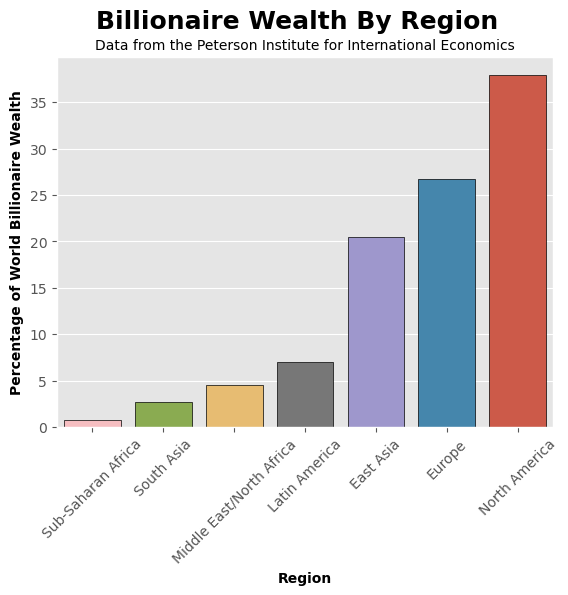

In [31]:
plt.style.use('ggplot')
plt.suptitle('Billionaire Wealth By Region', weight='bold', color='black').set_fontsize(18)
plt.title('Data from the Peterson Institute for International Economics', color='black').set_fontsize(10)
sns.barplot(x=region_percentage['Region'], y=region_percentage['Region_Percent'], edgecolor='black')
plt.xlabel('Region', weight = 'bold', color = 'black')
plt.xticks(rotation=45);
plt.ylabel('Percentage of World Billionaire Wealth', weight = 'bold', color = 'black')
plt.gca().invert_xaxis()

In [32]:
citizen = pd.read_sql(''' SELECT Country_code, Net_worth_US_billion, COUNT(Country_code) AS Country_code_count,
                        COUNT(Country_code) * 100.0 / (SELECT COUNT(*) FROM billion_data) AS Country_code_percent
                        FROM billion_data
                        GROUP BY Country_code
                        ORDER BY Country_code_percent DESC
                        LIMIT 15
                        ''', billion_conn)
citizen

,Country_code,Net_worth_US_billion,Country_code_count,Country_code_percent
0,USA,18.5,4515,34.544759
1,DEU,25.0,800,6.120888
2,CHN,15.1,765,5.853099
3,RUS,18.6,595,4.552410
4,JPN,9.2,480,3.672533
5,BRA,5.1,405,3.098699
6,HKG,12.7,385,2.945677
7,FRA,34.5,360,2.754399
8,GBR,6.5,325,2.486611
9,IND,18.6,315,2.410099


#### Although the U.S. and China typically dominate the headlines for wealth acquisition, the Netherlands (DEU) is second on the list of countries with the most billionaires per capita. 

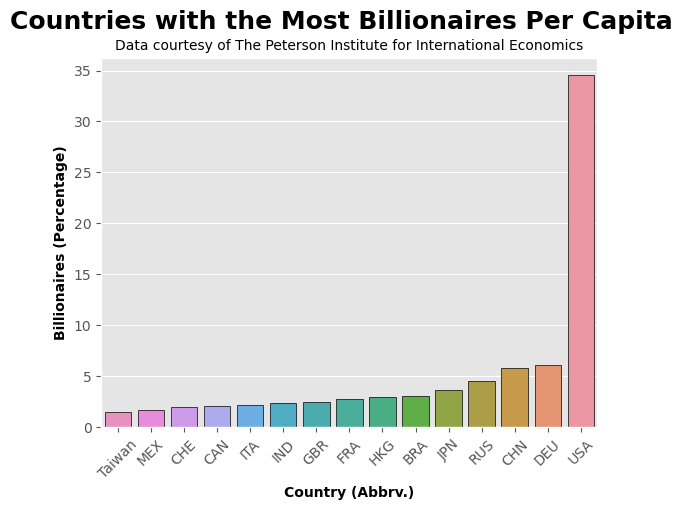

In [33]:
plt.style.use('ggplot')
plt.suptitle('Countries with the Most Billionaires Per Capita', weight='bold', color = 'black').set_fontsize(18)
plt.title('Data courtesy of The Peterson Institute for International Economics', color = 'black').set_fontsize(10)
sns.barplot(x=citizen['Country_code'], y=citizen['Country_code_percent'], edgecolor='black')
plt.xlabel('Country (Abbrv.)', weight = 'bold', color = 'black')
plt.ylabel('Billionaires (Percentage)', weight = 'bold', color = 'black')
plt.xticks(rotation=45);
plt.gca().invert_xaxis()

In [34]:
europe_billion = pd.read_sql(''' SELECT Citizenship, Country_code, AVG(Net_worth_US_billion)
                                FROM billion_data
                                WHERE Region = 'Europe' AND Citizenship IS NOT 'Egypt'
                                GROUP BY Citizenship
                                ORDER BY AVG(Net_worth_US_billion) DESC
                                LIMIT 15
                                ''', billion_conn)
europe_billion

,Citizenship,Country_code,AVG(Net_worth_US_billion)
0,Sweden,SWE,6.103704
1,Georgia,GEO,5.200000
2,Cyprus,CYP,4.925000
3,France,FRA,4.679167
4,Germany,DEU,4.193750
5,Spain,ESP,3.848649
6,Ireland,IRL,3.812500
7,Italy,ITA,3.798276
8,Russia,RUS,3.654622
9,Denmark,DEN,3.580000


#### Although billionaires live in western European nations like France, Italy and Sweden, former Soviet satellite states like Georgia and Ukraine boast average billionaire net worths of between 3 and 4 billion dollars. 

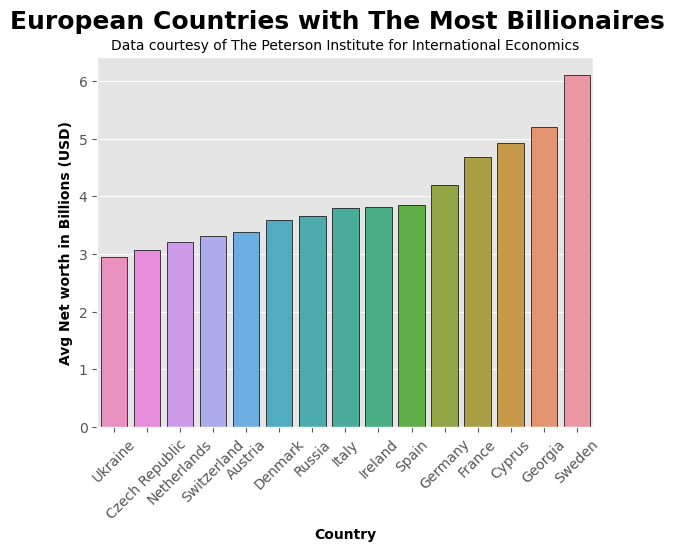

In [35]:
plt.suptitle('European Countries with The Most Billionaires', weight='bold', color = 'black').set_fontsize(18)
plt.title('Data courtesy of The Peterson Institute for International Economics', color = 'black').set_fontsize(10)
sns.barplot(x=europe_billion['Citizenship'], y=europe_billion['AVG(Net_worth_US_billion)'], edgecolor='black')
plt.xlabel('Country', weight = 'bold', color = 'black')
plt.xticks(rotation=45)
plt.ylabel('Avg Net worth in Billions (USD)', weight = 'bold', color = 'black')
plt.gca().invert_xaxis()

In [36]:
africa_billion = pd.read_sql(''' SELECT Citizenship, Country_code, AVG(Net_worth_US_billion)
                                FROM billion_data
                                WHERE Region = 'Middle East/North Africa'
                                GROUP BY Citizenship
                                ORDER BY AVG(Net_worth_US_billion) DESC
                                LIMIT 15
                                ''', billion_conn)
africa_billion

,Citizenship,Country_code,AVG(Net_worth_US_billion)
0,Saudi Arabia,SAU,4.831818
1,United Arab Emirates,ARE,3.300000
2,Algeria,DZA,3.200000
3,Israel,ISR,2.526923
4,Kuwait,KWT,2.214286
5,Lebanon,LBN,2.188889
6,Egypt,EGY,2.075000
7,Turkey,TUR,2.043750
8,Morocco,MAR,1.850000
9,Oman,OMN,1.150000


#### Both Saudi Arabia and UAE include royal families that have maintained billionaire net worths for generations. The wealthiest African nations tend to be concentrated in the north in areas like Egypt and Algeria. 

Text(0, 0.5, 'Country')

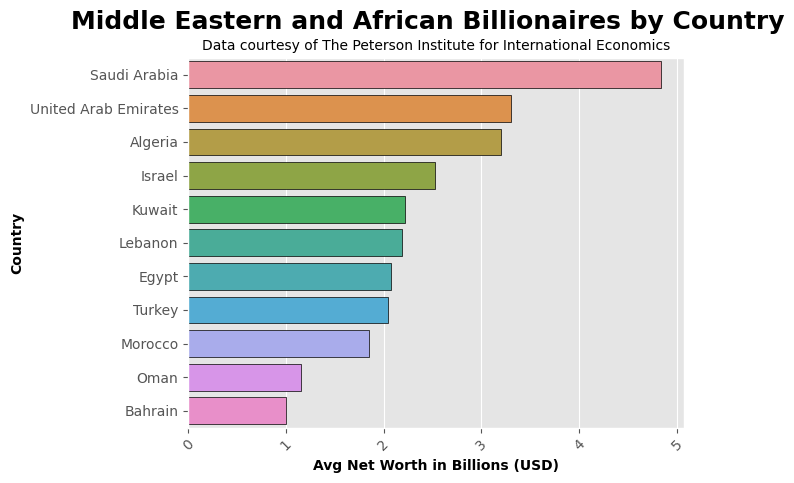

In [37]:
plt.style.use('ggplot')
plt.suptitle('Middle Eastern and African Billionaires by Country', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data courtesy of The Peterson Institute for International Economics', color = 'black').set_fontsize(10)
sns.barplot(x=africa_billion['AVG(Net_worth_US_billion)'], y=africa_billion['Citizenship'], edgecolor='black', orient='h')
plt.xlabel('Avg Net Worth in Billions (USD)', weight = 'bold', color = 'black')
plt.xticks(rotation=45)
plt.ylabel('Country', weight = 'bold', color = 'black')

In [38]:
age_forbes = pd.read_sql(''' SELECT DISTINCT Name, Age, Rank FROM billion_data
                            WHERE RANK < 101
                            GROUP BY AGE
                            ORDER BY Rank ASC
                            ''', billion_conn)
age_forbes

,Name,Age,Rank
0,Bill Gates,40.0,1
1,Bill Gates,45.0,1
2,Bill Gates,58.0,1
3,Warren Buffett,65.0,2
4,Warren Buffett,70.0,2
...,...,...,...
56,Rolf Gerling,41.0,79
57,Spiro Latsis,54.0,79
58,Pierre Omidyar,33.0,82
59,Johanna Quandt,87.0,82


#### Those ranking highest on the Forbes 100 list tend to be the oldest billionaires. The list includes individuals like Warren Buffett and Charles Koch. The distribution and line plots below demonstrate that most billionaires on the Forbes 100 tend to be between 50 and 70 years old. 

Text(0, 0.5, 'Count')

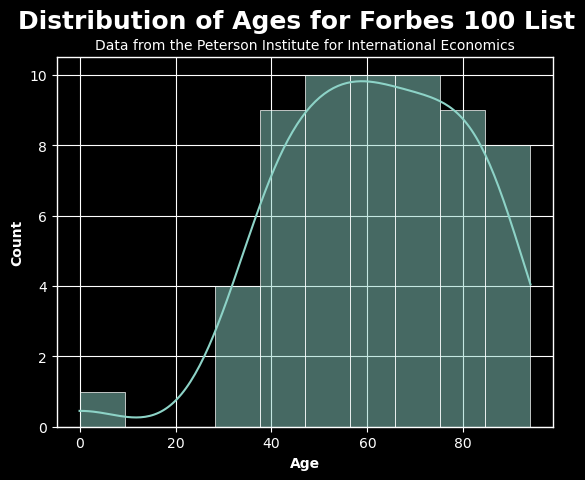

In [39]:
plt.style.use('dark_background')
plt.suptitle('Distribution of Ages for Forbes 100 List', weight = 'bold', color = 'white').set_fontsize(18)
plt.title('Data from the Peterson Institute for International Economics', color = 'white').set_fontsize(10)
sns.histplot(age_forbes['Age'], kde=True, bins=10)
plt.xlabel('Age', weight = 'bold', color = 'white')
plt.ylabel('Count', weight = 'bold', color = 'white')

Text(0, 0.5, 'Rank')

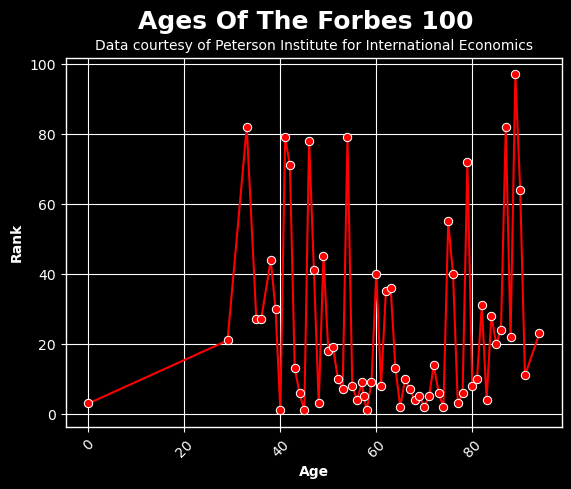

In [40]:
plt.style.use('dark_background')
sns.lineplot(x=age_forbes['Age'], y=age_forbes['Rank'], color = 'red', marker='o')
plt.suptitle('Ages Of The Forbes 100', weight = 'bold', color='white').set_fontsize(18)
plt.title('Data courtesy of Peterson Institute for International Economics', color='white').set_fontsize(10)
plt.xlabel('Age', weight = 'bold', color = 'white')
plt.xticks(rotation=45)
plt.ylabel('Rank', weight = 'bold', color = 'white')

# Conclusion

#### Although the data omits recently annointed top billionaires such as Jeff Bezos and Elon Musk, it remains a fairly comprehensive and transparent sample of an elusive population. While certain assumptions about billionaires remain true, such as the fact that some of the richest people in the world are heirs and heiresses, there were also surprising revelations. For instance, billionaire age and wealth is negatively correlated, with little to no increase as an individual with a billion dollar net worth ages. 

#### Additionally, the real estate sector mints the most billionaires. This insight contradicts the image most Americans have of billionaires as finaciers such as Warren Buffet or retail giants like the Walton family. While reaching a billion dollar net worth is a distinction few individuals will attain in their lifetimes, investor pools such as Silicon Valley angel investors and cryptocurrency investors will continue to fuel the next Mark Zuckerburg-esque wunderkind in an industry containing companies with trillion dollar valuations. By extension, tracking the growth of the billionaire class often means tracking the advancement of companies and brands across industries to determine where innovation, wealth and power will be concentrated in the coming years and decades. 